In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
colab_path = "/gdrive/My Drive/Colab Notebooks/"

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread(os.path.join(colab_path, 'lena.jpg'), cv2.IMREAD_COLOR)

In [ ]:
img.shape

(225, 400, 3)

In [ ]:
img.size

270000

In [ ]:
img.dtype # uint8 : unsigned integer, 8비트짜리 정수형, 범위 0~255(2^1 ~ 2^8)

dtype('uint8')

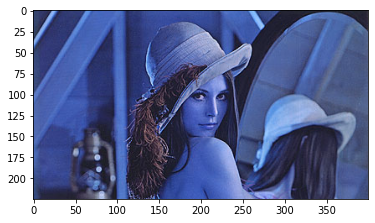

In [ ]:
plt.imshow(img) # 기본컬러순서 B G R

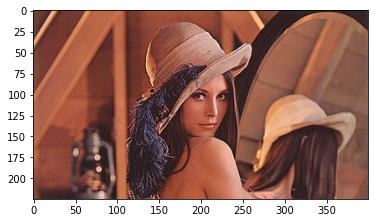

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB로 색공간 변환
# cv2.COLOR_BGR2RGB == img[:,:,[2,1,0]]  ----> BGR => RGB로 색공간 변환
plt.imshow(img_rgb)

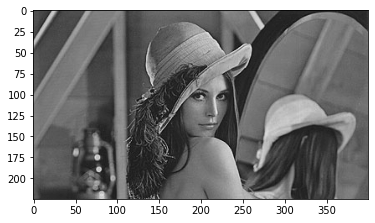

In [ ]:
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img_y = img_ycbcr[:,:,0] # y 채널 추출 (0번째 인덱스), 명도값
plt.imshow(img_y, cmap='gray') # 명도 gray색으로 변환

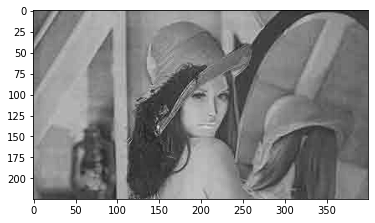

In [ ]:
img_cr = img_ycrcb[:,:,1] # Cr 채널 추출 (1번째 인덱스)
plt.imshow(img_cr, cmap='gray') # 

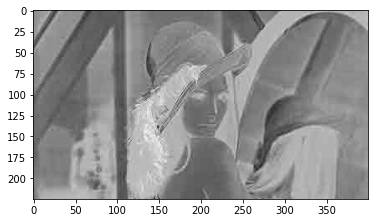

In [ ]:
img_cb = img_ycrcb[:,:,2] # Cb채널 추출
plt.imshow(img_cb, cmap='gray')

In [ ]:
img_gray = cv2.imread(os.path.join(colab_path, 'lena.jpg'), cv2.IMREAD_GRAYSCALE)

In [ ]:
img_gray.shape

(225, 400)

In [ ]:
img_gray.size

90000

In [ ]:
img_gray.dtype

dtype('uint8')

# **이미지 읽기 쓰기**

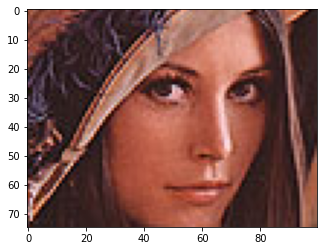

In [ ]:
img_rgb_crop = img_rgb[75:150, 150:250, :]
plt.imshow(img_rgb_crop)

In [ ]:
cv2.imwrite(os.path.join(colab_path, 'lena_face.png'), img_rgb_crop) # png형식 파일로 자른 사진 쓰기(저장)

True

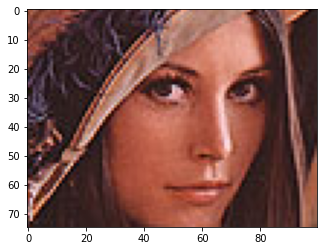

In [ ]:
img_sample = cv2.imread(os.path.join(colab_path, 'lena_face.png'), cv2.IMREAD_COLOR) # 저장한 사진 읽기
plt.imshow(img_sample)

In [ ]:
cv2.imwrite(os.path.join(colab_path, 'lena_face.jpg'), img_rgb_crop)

True

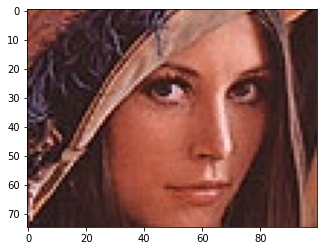

In [ ]:
img_sample = cv2.imread(os.path.join(colab_path, 'lena_face.jpg'), cv2.IMREAD_COLOR) # 저장한 사진 읽기
plt.imshow(img_sample)

# **영상처리**

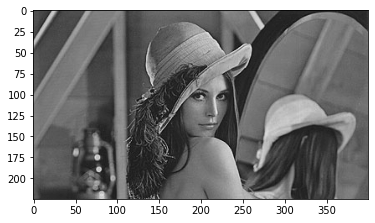

In [ ]:
import numpy as np

img = cv2.imread(os.path.join(colab_path, 'lena.jpg'), cv2.IMREAD_COLOR)
kernel = np.ones((5,5), np.uint8)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray, cmap='gray')

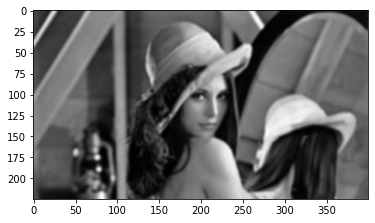

In [ ]:
# GaussianBlur : 흐림효과
img_Blur = cv2.GaussianBlur(imgGray, (7,7), 0)
plt.imshow(img_Blur, cmap='gray')

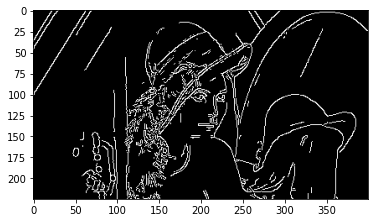

In [ ]:
# highpass 필터에서 가장 많이 사용되는 Canny Edge Detection : 경계선 추출
img_Canny = cv2.Canny(imgGray, 150, 200)
plt.imshow(img_Canny, cmap='gray')

(225, 400, 3)
(450, 800, 3)


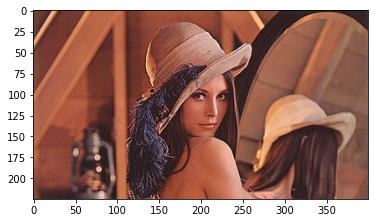

In [ ]:
# img 크기 변화
img = cv2.imread(os.path.join(colab_path, 'lena.jpg'), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)

imgResize = cv2.resize(img_rgb, (800, 450)) # 순서 열, 행 순
print(imgResize.shape)

plt.imshow(img_rgb)

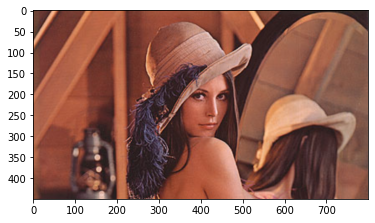

In [ ]:
plt.imshow(imgResize)

# **얼굴 탐지**

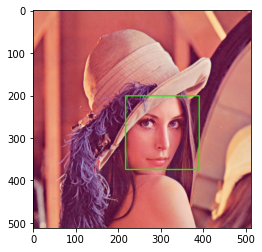

In [ ]:
faceCascade = cv2.CascadeClassifier(os.path.join(colab_path, "haarcascade_frontalface_default.xml")) # CascadeClassifier로 미리 학습된 모델을 가져온다, 가볍게 얼굴인식할 때 유용
img = cv2.imread(os.path.join(colab_path, 'lena.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(img_gray, 1.1, 4) # 

for (x,y,w,h) in faces: # face 탐지를 하게 되면 x,y좌표와 크기 및 높이를 각각 사각형을 그려준다.
  cv2.rectangle(img_rgb,(x,y), (x+w, y+h), (0,255,0),2) # 사각형 좌표 (x,y), 크기(x+w, y+h) 색상정보를 반영(Green 채널).
plt.imshow(img_rgb)

# **차량 번호판 탐지**

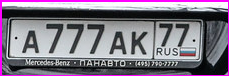

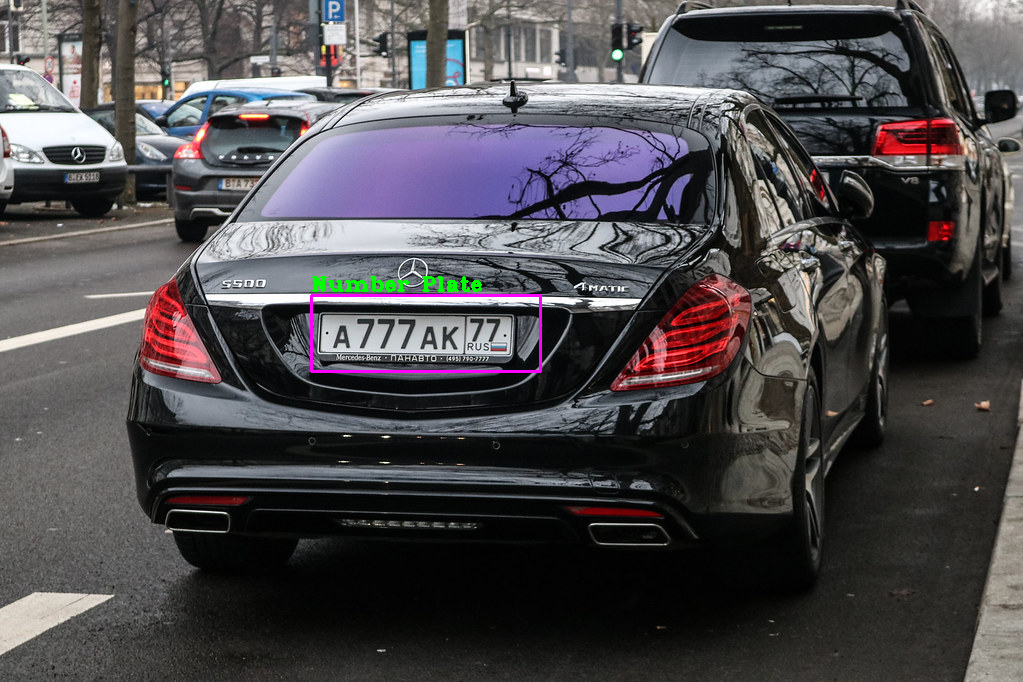

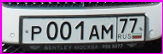

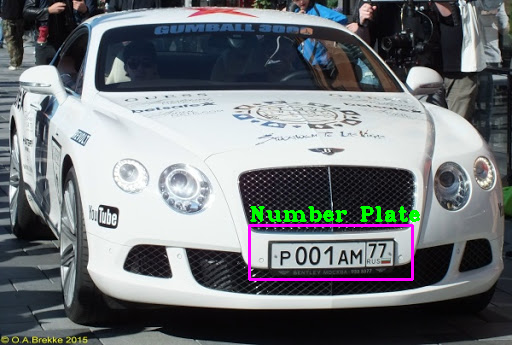

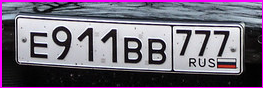

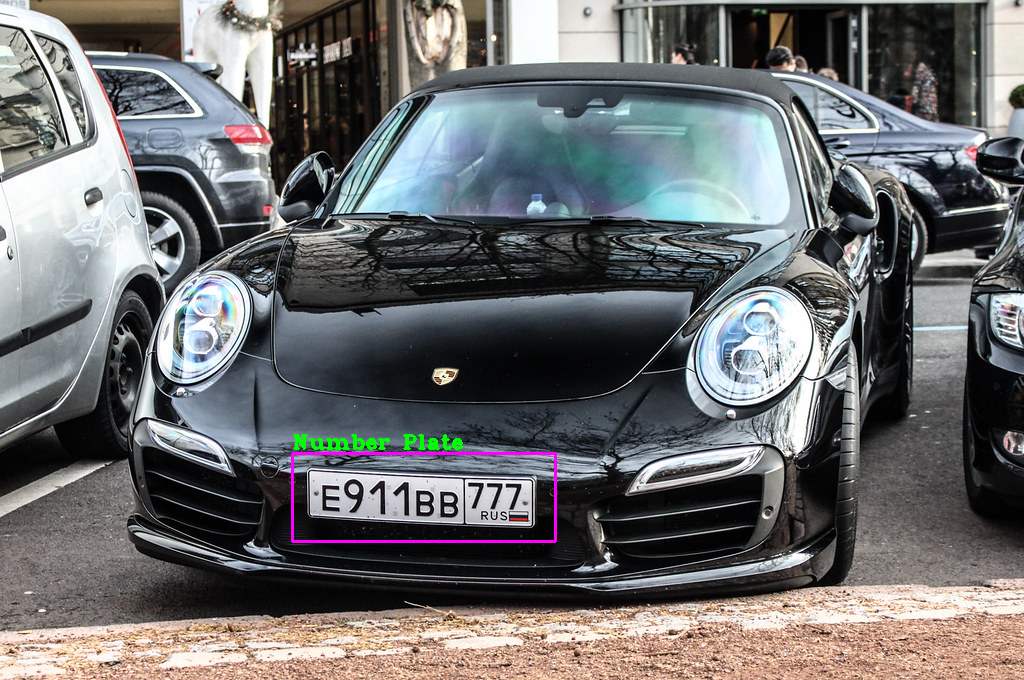

In [ ]:
frameWidth = 640
frameHeight = 480
nPlateCascade = cv2.CascadeClassifier(os.path.join(colab_path,"haarcascade_russian_plate_number.xml"))
minArea = 200
color = (0,255,0)
img_list = ['p1.jpg', 'p2.jpg', 'p3.jpg']
count = 0

for cuur_img in img_list:
  img = cv2.imread(os.path.join(colab_path, cuur_img), cv2.IMREAD_COLOR)
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  numberPlates = nPlateCascade.detectMultiScale(imgGray, 1.1, 10) # Gray채널 하나만 쓰는게 빠르므로 쓴다.
  for (x,y,w,h) in numberPlates:
    area=w*h 
    if area > minArea:
      cv2.rectangle(img, (x,y), (x+w, y+h),(255,0,255), 2)
      cv2.putText(img, "Number Plate", (x,y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,color,2)
      imgRoi = img[y:y+h, x:x+w]
      cv2_imshow(imgRoi) # colab에서는 function으로 바꿔서 실행을 해야한다. 로컬에서는 cv2.imshow()

  cv2_imshow(img) # BGR -> RGB 변환 포함
  
  if cv2.waitKey(1) & 0xFF == ord('s'):
    cv2.rectangle(img,(0,200),(640,300), (0,255,0), cv2.FILLED)
    cv2.putText(img,"Scan Saved", (150,265), cv2.FONT_HERSHEY_DUPLEX,2,(0,0,255),2)
    cv2_imshow(img)

    cv2.waitKey(500)

# 얼굴탐지

문제: many_faces.jpg 파일의 모든 얼굴을 탐지하여 plot하기
- 사람 얼굴을 red box로 표시하기
- 얼굴 탐지 코드 활용하기
- 모든 사람의 얼굴에 red box는 1개만 표시하기

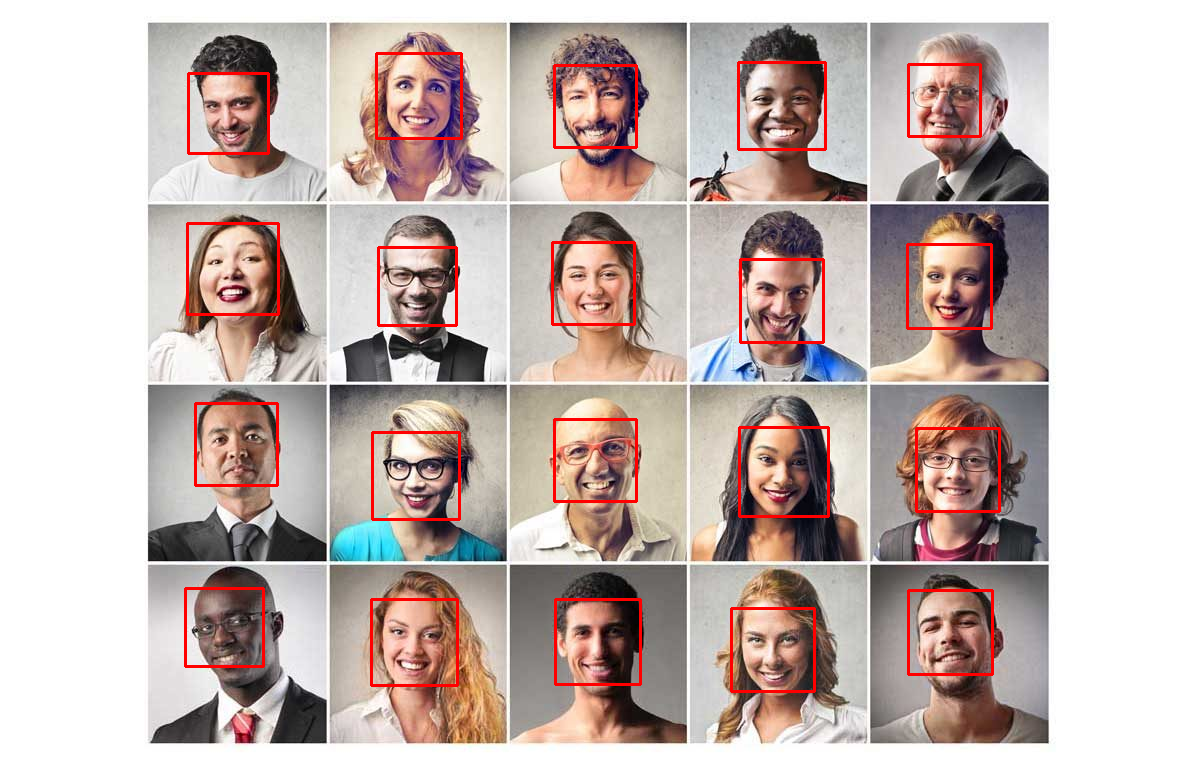

In [ ]:
faceCascade = cv2.CascadeClassifier(os.path.join(colab_path, "haarcascade_frontalface_default.xml"))
img = cv2.imread(os.path.join(colab_path, 'many_faces.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(img_gray, 1.1, 4)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y), (x+w, y+h), (0,0,255),2)
cv2_imshow(img)